# Indian Crop yield data from year 1997-2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crop_yield.csv')

In [3]:
df = df[df['Crop_Year'] != 2020]

In [4]:
df.head(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [5]:
df.shape

(19652, 10)

In [6]:
df['Season'].unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [7]:
# removing spaces prresent in season column
df['Season'] = df['Season'].str.strip()

In [8]:
df['Fertilizer'] = df['Fertilizer'].apply(lambda x: x/1000)
df['Fertilizer'] = df['Fertilizer'].apply(lambda x: np.round(x,3))

df['Pesticide'] = df['Pesticide'].apply(lambda x: x/1000)
df['Pesticide'] = df['Pesticide'].apply(lambda x: np.round(x,3))

In [9]:
df['Input_Per_Unit_Area'] = (df['Fertilizer'] + df['Pesticide']) / df['Area']

In [10]:
df.drop(columns=['Fertilizer','Pesticide'], inplace=True)

In [11]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Yield', 'Input_Per_Unit_Area'],
      dtype='object')

In [12]:
df['Season'].unique()

array(['Whole Year', 'Kharif', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

# Bivariate Analysis:

In [19]:
df.head(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Yield,Input_Per_Unit_Area
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,0.796087,0.09548
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,0.710435,0.09548
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,0.238333,0.09548
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,5238.051739,0.09548
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,0.420909,0.09548


## Yield Per Year:

In [14]:
yield_per_year = df.groupby('Crop_Year')['Yield'].sum().reset_index()

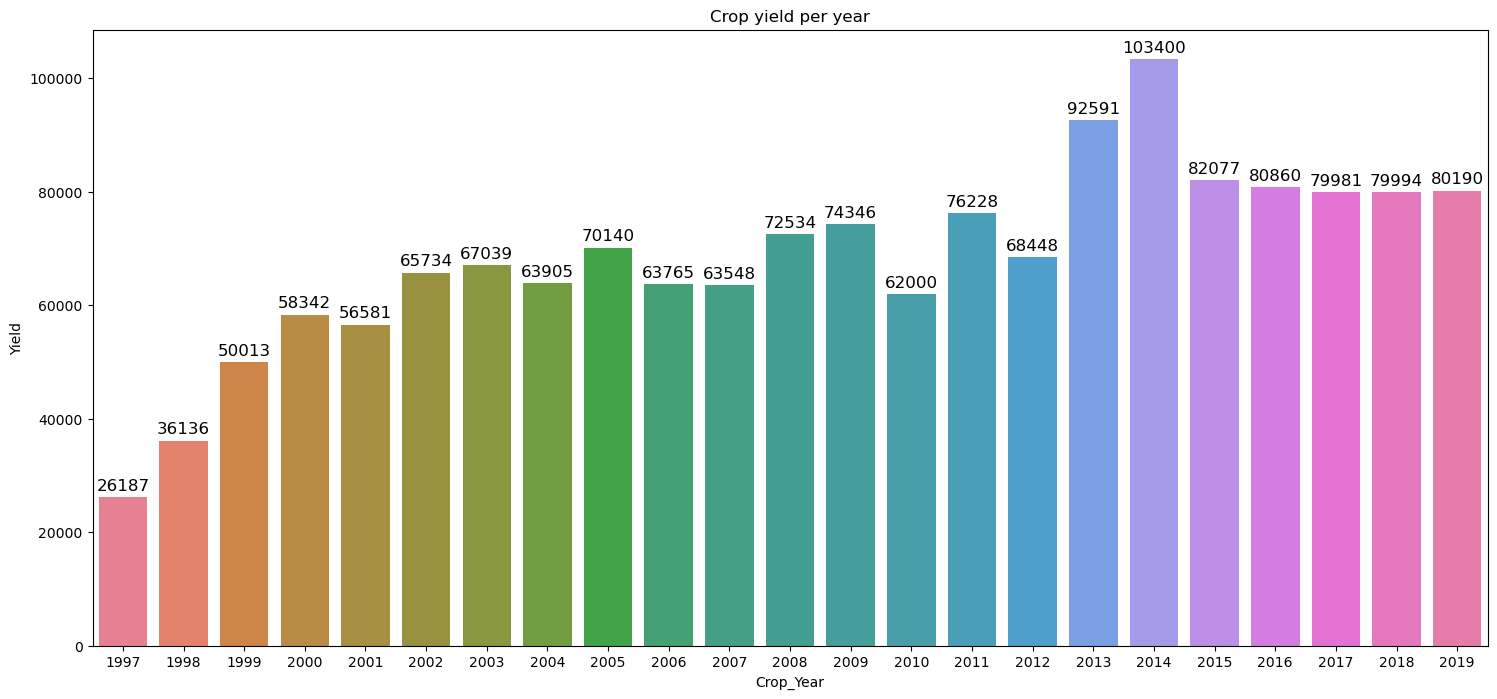

In [15]:
plt.figure(figsize=(18,8))
ax = sns.barplot(x='Crop_Year',y='Yield', palette='husl',data=yield_per_year)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Show plot
plt.title('Crop yield per year')
plt.show()

## Rainfall per Year:

In [24]:
rain_per_year = df.groupby('Crop_Year')['Annual_Rainfall'].first().reset_index()

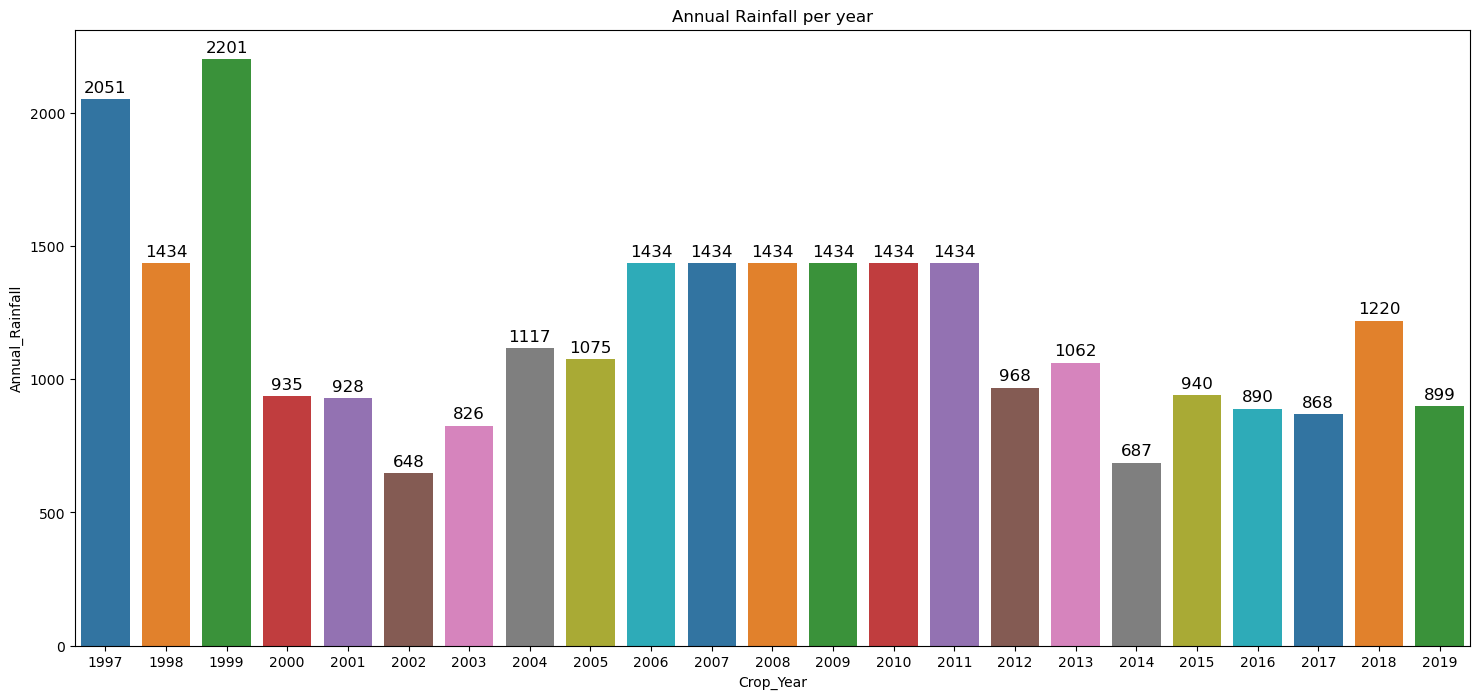

In [27]:
plt.figure(figsize=(18,8))
ax = sns.barplot(x='Crop_Year',y='Annual_Rainfall', palette='tab10',data=rain_per_year)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Show plot
plt.title('Annual Rainfall per year')
plt.show()

In [38]:
input_per_year = df.groupby('Crop_Year')['Input_Per_Unit_Area'].sum().reset_index()

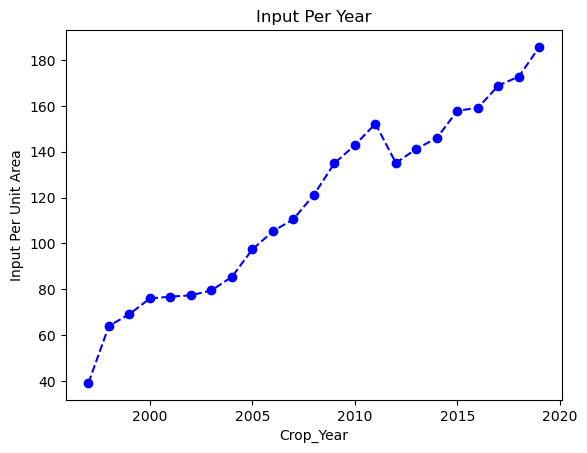

In [43]:
plt.plot(input_per_year['Crop_Year'], input_per_year['Input_Per_Unit_Area'], marker='o', linestyle='--', color='b')
plt.xlabel('Crop_Year')
plt.ylabel('Input Per Unit Area')
plt.title('Input Per Year')

plt.show()